In [1]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mgwr

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy --upgrade

  Using cached numpy-1.26.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mgwr --upgrade

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install libpysal --upgrade

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install esda --upgrade

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install splot --upgrade

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import libpysal as lps
import esda
import matplotlib.pyplot as plt

In [4]:
from matplotlib.lines import Line2D

In [7]:
df = pd.read_csv("Data_clean/cleaned_data_12061010.csv", encoding="ISO-8859-1",parse_dates=['last_review'])

In [8]:
df.head()

,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,last_review,...,reviews_per_month_normalized,market_activity,covid_period,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid,log_price,year_2019,year_2023
0,49602995,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,35.0,278,47,-0.37900,2019-11-06,...,0.014943,0.806531,0,False,True,False,0,3.555348,1,0
1,25587547,1,Stunning Central London Apartment Close The River,7,51.47398,103.0,317,8,-0.21531,2019-11-06,...,0.000000,0.873340,0,False,False,False,0,4.634729,1,0
2,228095684,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,85.0,139,16,-0.16670,2019-11-06,...,0.008575,0.398113,0,False,False,False,0,4.442651,1,0
3,234271729,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,32.0,140,50,-0.27561,2019-11-06,...,0.039565,0.453986,0,False,True,False,0,3.465736,1,0
4,246523174,2,room in the cottage,2,51.59863,30.0,157,15,-0.39746,2019-11-06,...,0.018509,0.456846,0,False,True,False,0,3.401197,1,0


In [9]:
gdf_points_filtered = gpd.GeoDataFrame(
    df[['price', 'minimum_nights','market_activity','year']],  # Contains the required columns
    geometry=gpd.points_from_xy(df.longitude, df.latitude),  # Creating Point Geometry Using Longitude and Latitude
    crs="EPSG:4326"  # Set the initial coordinate reference system to WGS 84.
)
gdf_points_filtered.head()

,price,minimum_nights,market_activity,year,geometry
0,35.0,1,0.806531,2019,POINT (-0.37900 51.44473)
1,103.0,7,0.873340,2019,POINT (-0.21531 51.47398)
2,85.0,3,0.398113,2019,POINT (-0.16670 51.59118)
3,32.0,1,0.453986,2019,POINT (-0.27561 51.37960)
4,30.0,2,0.456846,2019,POINT (-0.39746 51.59863)


In [10]:
gdf_neighborhoods = gpd.read_file('126/ESRI/London_Borough_Excluding_MHW.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        33 non-null     object  
 1   GSS_CODE    33 non-null     object  
 2   HECTARES    33 non-null     float64 
 3   NONLD_AREA  33 non-null     float64 
 4   ONS_INNER   33 non-null     object  
 5   SUB_2009    0 non-null      float64 
 6   SUB_2006    0 non-null      float64 
 7   geometry    33 non-null     geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 2.2+ KB
None


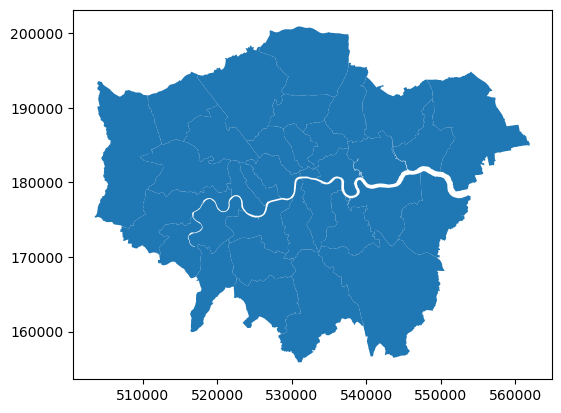

In [11]:
gdf_neighborhoods.plot()
print(gdf_neighborhoods.info())

In [12]:
# Determine the initial CRS for gdf_points, usually WGS 84
gdf_points_filtered.crs = "EPSG:4326"

# Trying to convert CRS again to gdf_neighborhoods' CRS
gdf_points_filtered = gdf_points_filtered.to_crs(gdf_neighborhoods.crs)

# Check the converted CRS
print(gdf_points_filtered.crs)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


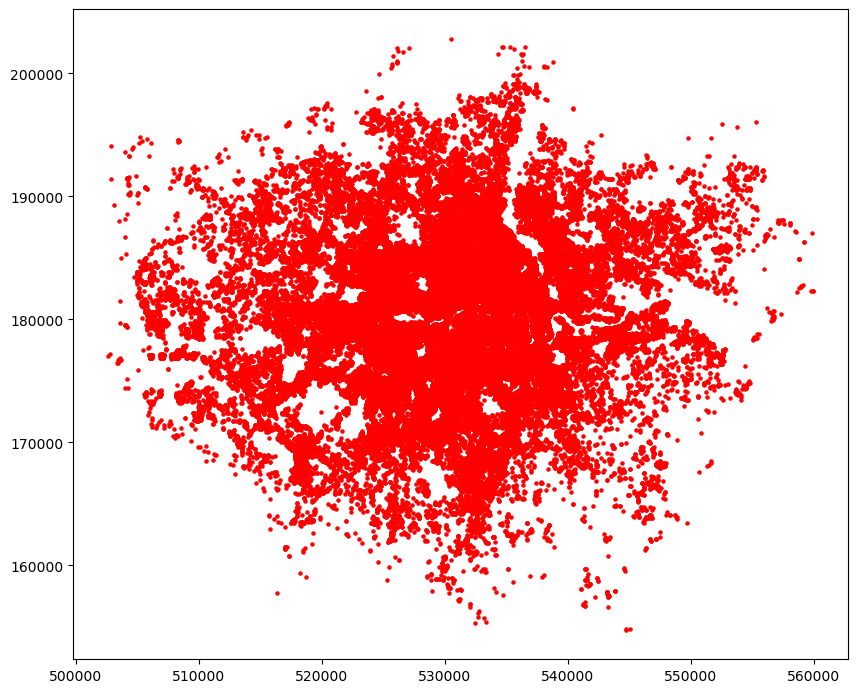

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_points_filtered.plot(ax=ax, color='red', markersize=5)
plt.show()

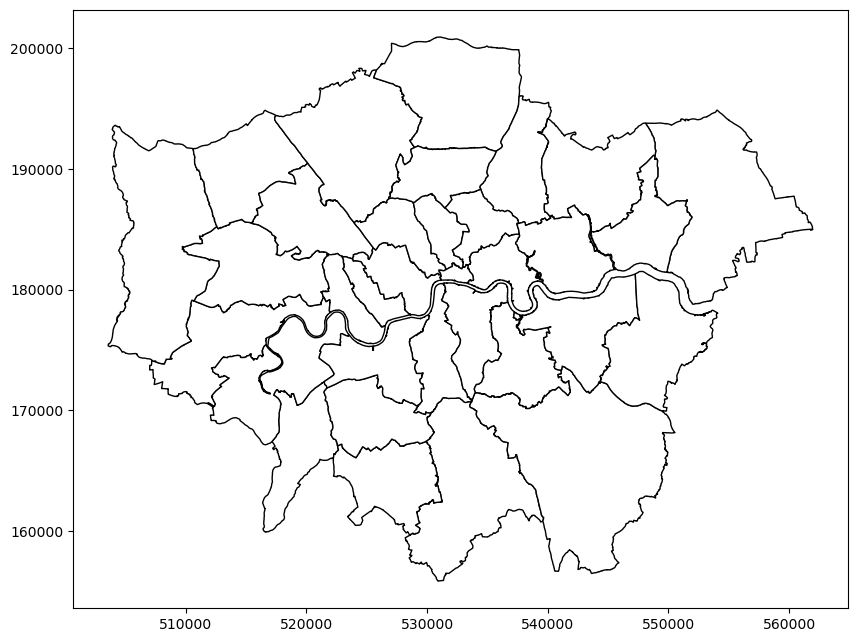

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_neighborhoods.plot(ax=ax, color='white', edgecolor='black')
plt.show()

In [15]:
print(gdf_points_filtered.crs)
print(gdf_neighborhoods.crs)
# If the CRSs don't match, they need to be set to the same CRS
# For example, if gdf_neighborhoods has the correct CRS, then gdf_points could be set to the same CRS
# gdf_points.set_crs(gdf_neighborhoods.crs, inplace=True)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_n

In [16]:
gdf_points_filtered.head()

,price,minimum_nights,market_activity,year,geometry
0,35.0,1,0.806531,2019,POINT (512750.672 172994.812)
1,103.0,7,0.873340,2019,POINT (524046.538 176511.933)
2,85.0,3,0.398113,2019,POINT (527095.760 189628.487)
3,32.0,1,0.453986,2019,POINT (520105.870 165916.158)
4,30.0,2,0.456846,2019,POINT (511093.063 190081.383)


In [17]:
print(gdf_points_filtered.describe())

               price  minimum_nights  market_activity           year
count  149746.000000   149746.000000    149746.000000  149746.000000
mean      135.208929        5.615649         0.547011    2021.152605
std       113.817788       25.850138         0.348634       1.506398
min        22.000000        1.000000         0.000651    2019.000000
25%        58.000000        1.000000         0.226501    2020.000000
50%       100.000000        2.000000         0.494876    2021.000000
75%       171.000000        3.000000         0.917607    2023.000000
max       795.000000     1125.000000         2.270491    2023.000000


In [18]:
gdf_spatial_join = gpd.sjoin(gdf_points_filtered, gdf_neighborhoods, how="inner", op='within')

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
gdf_spatial_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 149208 entries, 0 to 149738
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   price            149208 non-null  float64 
 1   minimum_nights   149208 non-null  int64   
 2   market_activity  149208 non-null  float64 
 3   year             149208 non-null  int64   
 4   geometry         149208 non-null  geometry
 5   index_right      149208 non-null  int64   
 6   NAME             149208 non-null  object  
 7   GSS_CODE         149208 non-null  object  
 8   HECTARES         149208 non-null  float64 
 9   NONLD_AREA       149208 non-null  float64 
 10  ONS_INNER        149208 non-null  object  
 11  SUB_2009         0 non-null       float64 
 12  SUB_2006         0 non-null       float64 
dtypes: float64(6), geometry(1), int64(3), object(3)
memory usage: 15.9+ MB


In [20]:
#Calculate the average price of each neighborhood in 2020, 2021, and 2022
# Create an empty DataFrame to store the results
gdf_neighborhoods_price = pd.DataFrame()
years_of_interest = [2019,2020,2021,2022]
for year in years_of_interest:
    # Calculate average price for each year
    temp_df = gdf_spatial_join[gdf_spatial_join['year'] == year]
    temp_avg_price = temp_df.groupby('NAME')['price'].mean().reset_index(name=f'avg_price_{year}')
    # If it is the first year, direct assignment
    if gdf_neighborhoods_price.empty:
        gdf_neighborhoods_price = temp_avg_price
    else:
        # Otherwise, merge into an existing DataFrame
        gdf_neighborhoods_price = gdf_neighborhoods_price.merge(temp_avg_price, on='NAME', how='outer')

In [21]:
gdf_neighborhoods_price.head()

,NAME,avg_price_2019,avg_price_2020,avg_price_2021,avg_price_2022
0,Barking and Dagenham,63.278261,68.602210,84.017341,105.819905
1,Barnet,69.404494,81.934189,98.240848,131.580229
2,Bexley,60.200000,70.968504,74.247934,91.258242
3,Brent,75.684817,92.306684,105.437408,125.479953
4,Bromley,57.014085,70.717593,86.820513,109.026415


In [22]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [23]:
# Assign the average price for each year to the corresponding neighborhood in the SHP file.
# First, delete the old price column in gdf_neighborhoods
columns_to_drop = ['avg_price_2019', 'avg_price_2020', 'avg_price_2021', 'avg_price_2022']
gdf_neighborhoods = gdf_neighborhoods.drop(columns=columns_to_drop, errors='ignore')

# merge the new price data
gdf_neighborhoods = gdf_neighborhoods.merge(gdf_neighborhoods_price, on='NAME', how='left')


In [24]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,avg_price_2019,avg_price_2020,avg_price_2021,avg_price_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",68.100529,69.994872,88.131707,115.000000
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",57.236074,57.172786,69.592857,90.643863
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",57.014085,70.717593,86.820513,109.026415
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",76.819718,81.838462,93.418605,120.410550
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",72.590982,74.748700,83.523894,112.920000


In [25]:
gdf_points_min_nights = gdf_points_filtered[gdf_points_filtered['minimum_nights'] >= 14]

In [26]:
gdf_points_min_nights.head()

,price,minimum_nights,market_activity,year,geometry
642,100.0,180,1.079273,2019,POINT (525992.701 179045.557)
771,82.0,91,0.953221,2019,POINT (524884.008 182811.462)
910,65.0,31,0.108259,2019,POINT (539234.754 178311.444)
1016,113.0,91,0.302246,2019,POINT (530048.194 182577.188)
1027,65.0,21,0.699798,2019,POINT (537313.950 176887.113)


In [27]:
years_of_interest = [2019,2020,2021,2022]
for year in years_of_interest:
    # Filtering out data for specific years
    yearly_data = gdf_points_min_nights[gdf_points_min_nights['year'] == year]

    # Use spatial connectivity to match these points to the corresponding boroughs
    joined_data = gpd.sjoin(yearly_data, gdf_neighborhoods, how="inner", predicate='within')

    # Calculation of the number of points per administrative district
    count_per_neighborhood = joined_data.groupby('NAME').size().reset_index(name=f'min_nights_count_{year}')

    # Merge statistics to gdf_neighborhoods
    if f'min_nights_count_{year}' in gdf_neighborhoods.columns:
        gdf_neighborhoods.drop(columns=[f'min_nights_count_{year}'], inplace=True)
    gdf_neighborhoods = gdf_neighborhoods.merge(count_per_neighborhood, on='NAME', how='left')

In [28]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,avg_price_2019,avg_price_2020,avg_price_2021,avg_price_2022,min_nights_count_2019,min_nights_count_2020,min_nights_count_2021,min_nights_count_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",68.100529,69.994872,88.131707,115.000000,4.0,6,8,12
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",57.236074,57.172786,69.592857,90.643863,5.0,21,19,23
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",57.014085,70.717593,86.820513,109.026415,1.0,6,7,11
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",76.819718,81.838462,93.418605,120.410550,5.0,21,28,18
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",72.590982,74.748700,83.523894,112.920000,7.0,35,56,37


In [29]:
print(gdf_neighborhoods['min_nights_count_2022'])

0      12
1      23
2      11
3      18
4      37
5       4
6      17
7      22
8      54
9      50
10     82
11    105
12     42
13     42
14      6
15     14
16     33
17     21
18      4
19     16
20     25
21     89
22     80
23    138
24    321
25    144
26    212
27     76
28    123
29     41
30     53
31     14
32     10
Name: min_nights_count_2022, dtype: int64


In [30]:
# Calculate the rate of price change and add to gdf_neighborhoods
gdf_neighborhoods['price_change_2019_2020'] = ((gdf_neighborhoods['avg_price_2020'] - gdf_neighborhoods['avg_price_2019']) / gdf_neighborhoods['avg_price_2019']) * 100
gdf_neighborhoods['price_change_2020_2021'] = ((gdf_neighborhoods['avg_price_2021'] - gdf_neighborhoods['avg_price_2020']) / gdf_neighborhoods['avg_price_2020']) * 100
gdf_neighborhoods['price_change_2021_2022'] = ((gdf_neighborhoods['avg_price_2022'] - gdf_neighborhoods['avg_price_2021']) / gdf_neighborhoods['avg_price_2021']) * 100

In [31]:
gdf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NAME                    33 non-null     object  
 1   GSS_CODE                33 non-null     object  
 2   HECTARES                33 non-null     float64 
 3   NONLD_AREA              33 non-null     float64 
 4   ONS_INNER               33 non-null     object  
 5   SUB_2009                0 non-null      float64 
 6   SUB_2006                0 non-null      float64 
 7   geometry                33 non-null     geometry
 8   avg_price_2019          33 non-null     float64 
 9   avg_price_2020          33 non-null     float64 
 10  avg_price_2021          33 non-null     float64 
 11  avg_price_2022          33 non-null     float64 
 12  min_nights_count_2019   31 non-null     float64 
 13  min_nights_count_2020   33 non-null     int64   
 14  min_nights_count_202

In [32]:
df1 = pd.read_csv("Data_clean/description.csv", encoding="ISO-8859-1")

In [33]:
df1.head()

,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,last_review,...,year_copy,id_copy,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid,description
0,383525,1,Two bedroom luxury Flat in Brixton with city v...,3,51.46193,85.0,10,65,-0.11085,2020-08-24,...,2020,73431,1,0,0,False,False,False,1,apartment top floor portered building apartmen...
1,466353,1,Maisonette in Central London Zone 1,2,51.48968,58.0,365,415,-0.11637,2020-02-23,...,2020,85191,1,0,0,False,True,False,0,bthe spacebbr room single bed nice spacious ma...
2,510439,1,North Kensington Ã¢ÂÂ Balcony Room,2,51.52099,49.0,354,297,-0.22852,2020-09-13,...,2020,97178,1,0,0,False,True,False,1,cosy double bedroom private shower room victor...
3,192627,1,"Stylish & Bright, 1 Bed, Shoreditch",3,51.52902,140.0,363,84,-0.08944,2020-02-16,...,2020,142117,1,0,0,False,False,False,0,newly decorated stylish apartment quiet area t...
4,497366,2,MODERN Self-Contained ARCHITECT FLAT,1,51.55083,65.0,338,30,-0.08425,2020-06-10,...,2020,190028,1,0,0,False,False,False,1,undertaking precaution necessary ensure non sp...


In [34]:
gdf_points_des = gpd.GeoDataFrame(
    df1[['description','year_copy']],  
    geometry=gpd.points_from_xy(df1.longitude, df1.latitude),# Create point geometry using longitude and latitude
    crs="EPSG:4326"  # Set initial coordinate reference system to WGS 84
)
gdf_points_des.head()

,description,year_copy,geometry
0,apartment top floor portered building apartmen...,2020,POINT (-0.11085 51.46193)
1,bthe spacebbr room single bed nice spacious ma...,2020,POINT (-0.11637 51.48968)
2,cosy double bedroom private shower room victor...,2020,POINT (-0.22852 51.52099)
3,newly decorated stylish apartment quiet area t...,2020,POINT (-0.08944 51.52902)
4,undertaking precaution necessary ensure non sp...,2020,POINT (-0.08425 51.55083)


In [35]:
# # 确定 gdf_points 的初始 CRS
gdf_points_des.crs = "EPSG:4326"

# Trying to convert CRS again to gdf_neighborhoods' CRS
gdf_points_des = gdf_points_des.to_crs(gdf_neighborhoods.crs)

# Check the converted CRS
print(gdf_points_filtered.crs)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [36]:
gdf_points_des.head()

,description,year_copy,geometry
0,apartment top floor portered building apartmen...,2020,POINT (531335.471 175353.929)
1,bthe spacebbr room single bed nice spacious ma...,2020,POINT (530872.642 178429.927)
2,cosy double bedroom private shower room victor...,2020,POINT (523002.635 181717.387)
3,newly decorated stylish apartment quiet area t...,2020,POINT (532627.970 182853.098)
4,undertaking precaution necessary ensure non sp...,2020,POINT (532924.444 185287.856)


In [37]:
years_of_interest = [2020,2021,2022]
for year_copy in years_of_interest:
    # Filtering out data for specific years
    yearly_data = gdf_points_des[gdf_points_des['year_copy'] == year_copy]

    # Use spatial connectivity to match these points to the corresponding boroughs
    joined_data = gpd.sjoin(yearly_data, gdf_neighborhoods, how="inner", predicate='within')

    # Calculation of the number of points per administrative district
    count_per_neighborhood = joined_data.groupby('NAME').size().reset_index(name=f'host_action_{year_copy}')

    # Merge statistics to gdf_neighborhoods
    if f'host_action_{year_copy}' in gdf_neighborhoods.columns:
        gdf_neighborhoods.drop(columns=[f'host_action_{year_copy}'], inplace=True)
    gdf_neighborhoods = gdf_neighborhoods.merge(count_per_neighborhood, on='NAME', how='left')

In [38]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,avg_price_2019,avg_price_2020,...,min_nights_count_2019,min_nights_count_2020,min_nights_count_2021,min_nights_count_2022,price_change_2019_2020,price_change_2020_2021,price_change_2021_2022,host_action_2020,host_action_2021,host_action_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",68.100529,69.994872,...,4.0,6,8,12,2.781686,25.911663,30.486522,8,12,10.0
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",57.236074,57.172786,...,5.0,21,19,23,-0.110574,21.723746,30.248803,21,17,11.0
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",57.014085,70.717593,...,1.0,6,7,11,24.035303,22.770742,25.576792,12,7,9.0
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",76.819718,81.838462,...,5.0,21,28,18,6.533145,14.150001,28.893544,34,33,25.0
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",72.590982,74.748700,...,7.0,35,56,37,2.972432,11.739594,35.194846,16,21,14.0


Global Moran's Index 2019: I = 0.5051141667819284, p-value = 0.001
Global Moran's Index 2020: I = 0.49067363719061347, p-value = 0.001
Global Moran's Index 2021: I = 0.4758183942600327, p-value = 0.001
Global Moran's Index 2022: I = 0.4888160185087678, p-value = 0.001


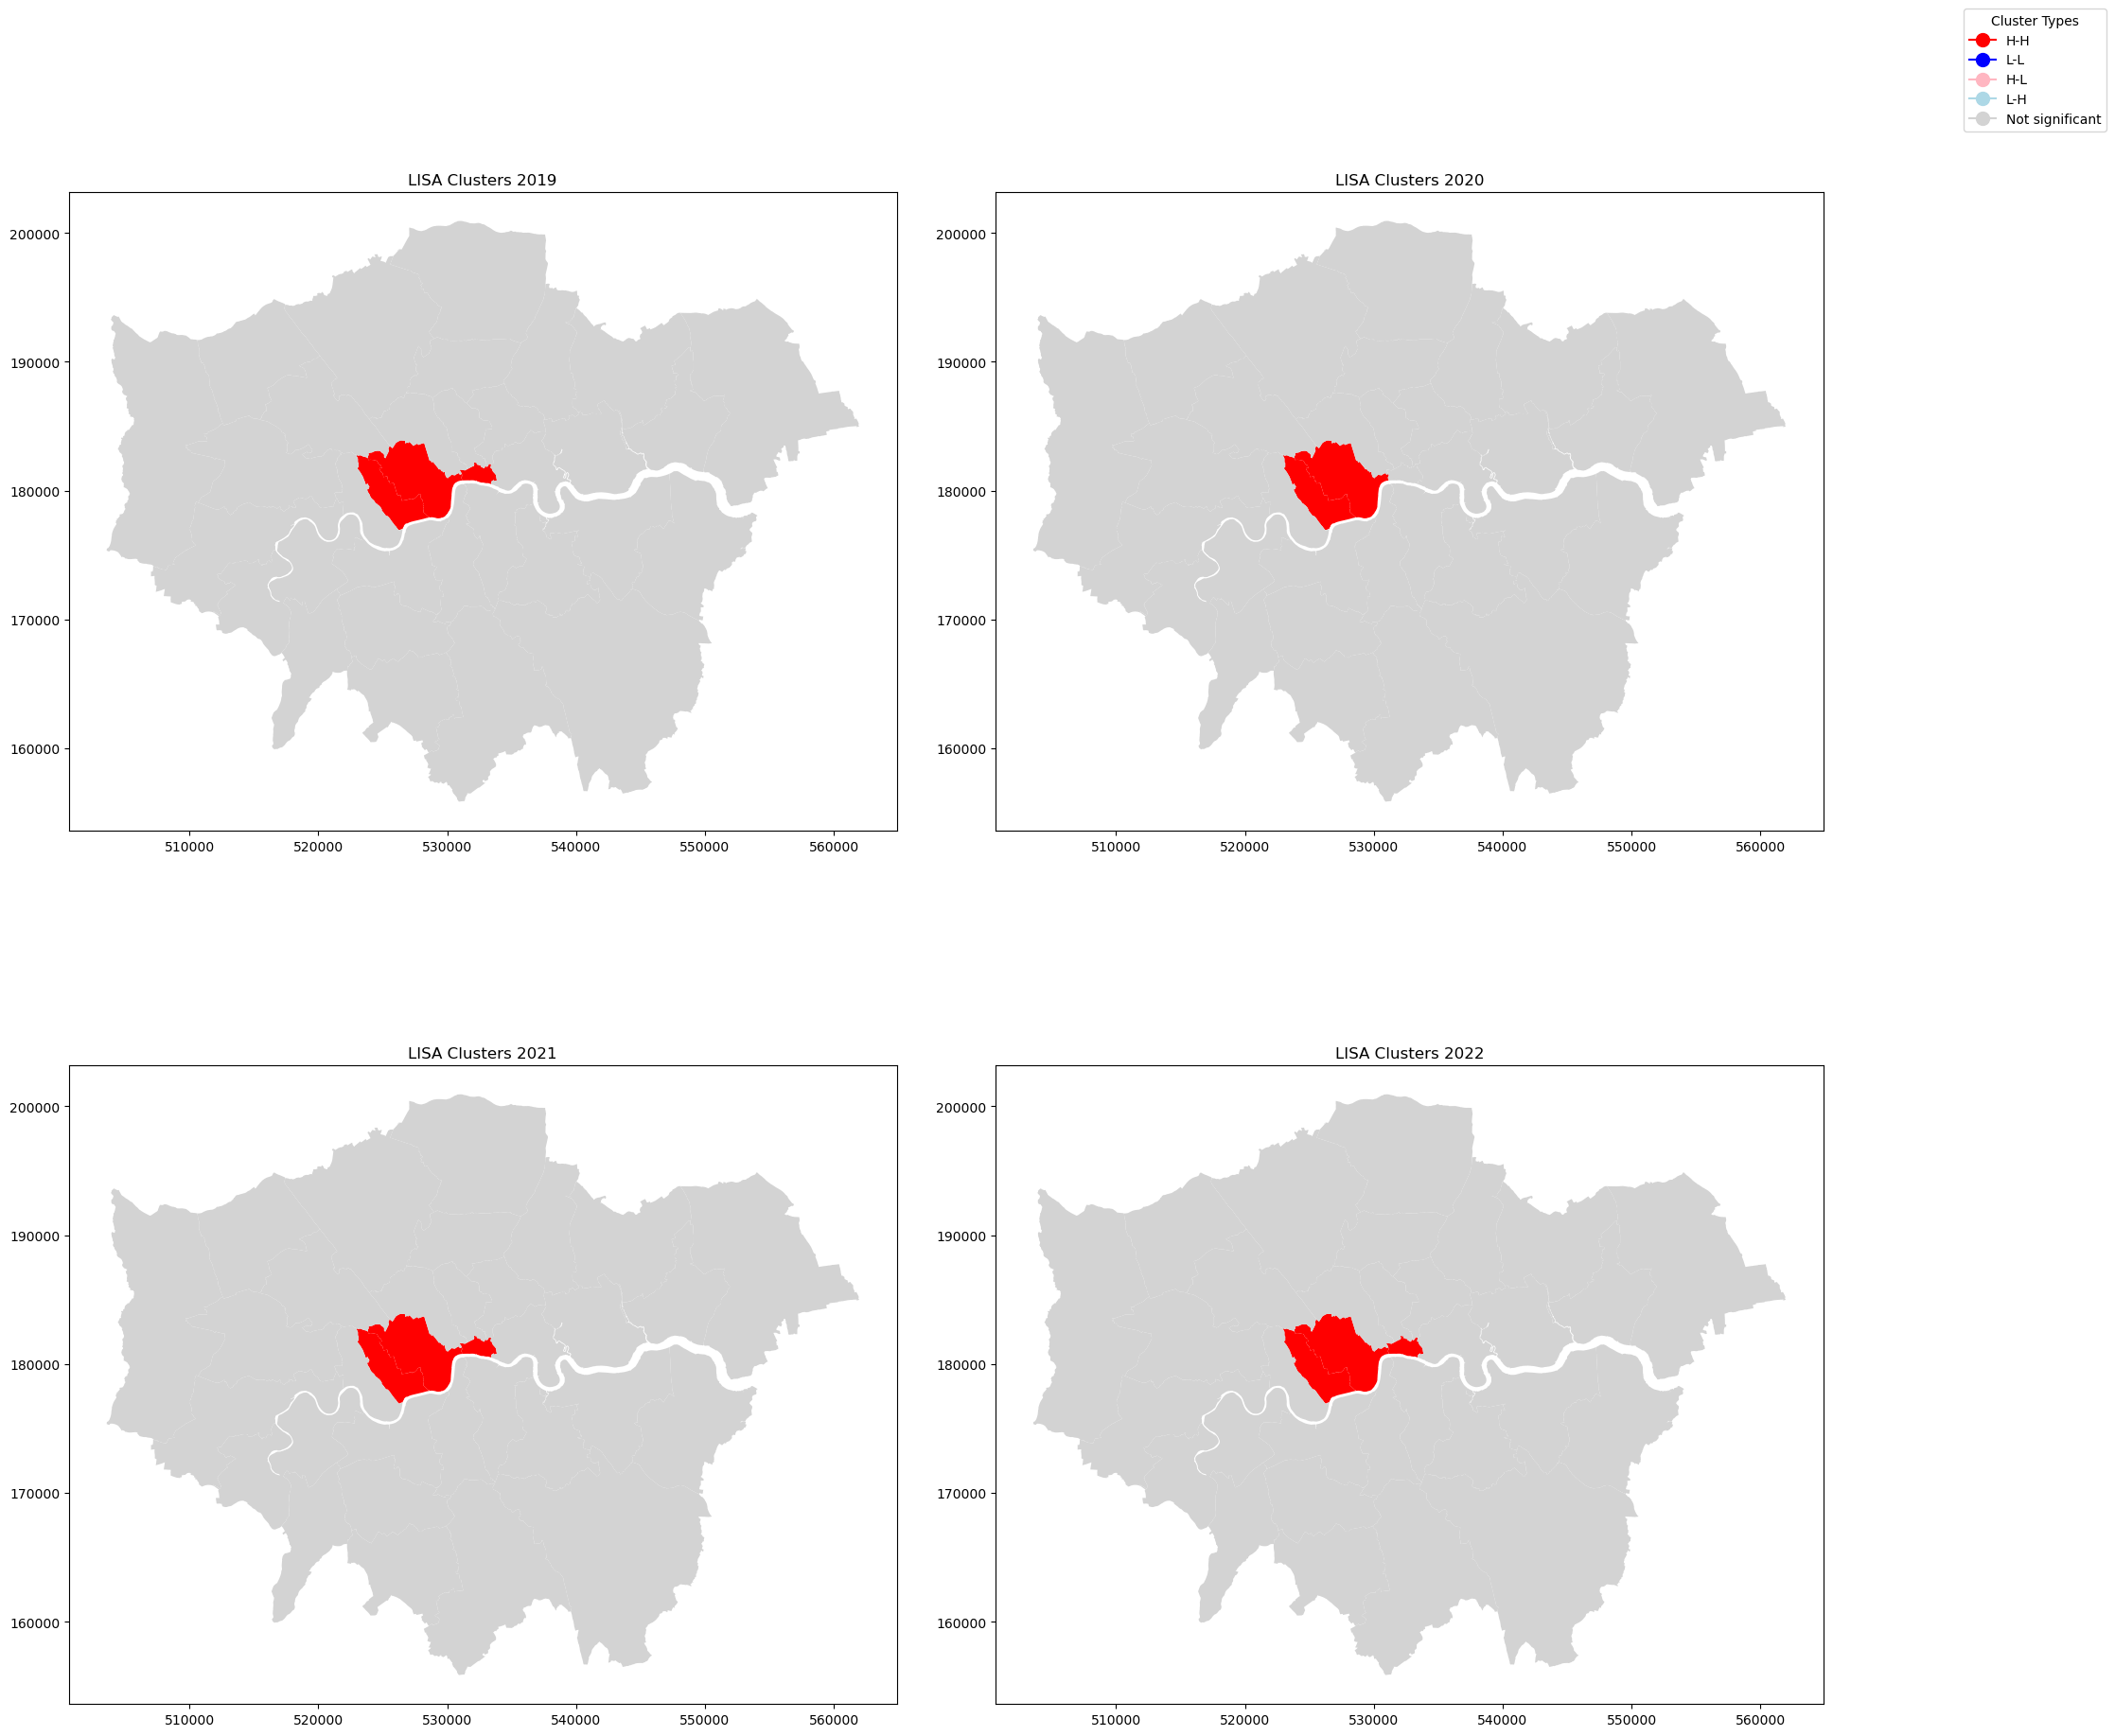

In [61]:
import esda
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import libpysal as lps
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import contextily as ctx  

# Assume gdf_neighborhoods is your GeoDataFrame
# Keep the rest of the code the same

# Setting the subgraph layout
fig, axs = plt.subplots(2, 2, figsize=(20, 20))  # 2 行 2 列

# Calculate the weighting matrix
w = lps.weights.Queen.from_dataframe(gdf_neighborhoods, use_index=True)
w.transform = 'r'

# Define a list of column name prefixes
years = ['2019', '2020', '2021', '2022']
avg_price_columns = [f'avg_price_{year}' for year in years]

# Calculate and print the global Moran index
for i, year in enumerate(years):  # Use enumerate to get both the index and the value at the same time.
    column = avg_price_columns[i]  # Getting the correct column name
    y = gdf_neighborhoods[column].values  # Use the correct column values
    moran_global = esda.Moran(y, w)
    print(f"Global Moran's Index {year}: I = {moran_global.I}, p-value = {moran_global.p_sim}")

# Creating custom legend labels
legend_labels = {
    1: 'High-High (H-H)',
    2: 'Low-Low (L-L)',
    3: 'Low-High (L-H)',
    4: 'High-Low (H-L)'
}

# Define the LISA category discriminant function
def lisa_classification(moran_loc):
    categories = []
    for z, i in zip(moran_loc.z, moran_loc.Is):
        if z > 1.96 and i > 0:
            categories.append("H-H")
        elif z > 1.96 and i < 0:
            categories.append("L-L")
        elif z < -1.96 and i > 0:
            categories.append("H-L")
        elif z < -1.96 and i < 0:
            categories.append("L-H")
        else:
            categories.append("Not significant")
    return categories

# Creating a colour map
color_map = {
    "H-H": "red",
    "L-L": "blue",
    "H-L": "lightpink",
    "L-H": "lightblue",
    "Not significant": "lightgrey"
}

# Mapping the LISA Cluster
for i, year in enumerate(years):
    y = gdf_neighborhoods[avg_price_columns[i]].values
    moran_loc = esda.Moran_Local(y, w)
    
    # Applying the LISA category discrimination rules
    gdf_neighborhoods[f'lisa_category_{year}'] = lisa_classification(moran_loc)
    
    # Select the current subgraph
    ax = axs[i // 2, i % 2]
    
   # map
    for category, color in color_map.items():
        # Check if the filtered GeoDataFrame is empty
        to_plot = gdf_neighborhoods[gdf_neighborhoods[f'lisa_category_{year}'] == category]
        if not to_plot.empty:
            to_plot.plot(ax=ax, color=color, label=category)
        ax.set_title(f'LISA Clusters {year}')
        ax.axis('on')

# Creating a Legend Handle
legend_handles = [Line2D([0], [0], marker='o', color=color, label=label, markersize=10)
                  for label, color in color_map.items()]

# Add Legend
fig.legend(handles=legend_handles, title='Cluster Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(pad=3.0)
plt.show()

In [37]:
print(gdf_neighborhoods.geometry.type)

0          Polygon
1          Polygon
2          Polygon
3          Polygon
4          Polygon
5          Polygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13    MultiPolygon
14         Polygon
15         Polygon
16         Polygon
17         Polygon
18         Polygon
19         Polygon
20         Polygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25         Polygon
26         Polygon
27         Polygon
28         Polygon
29         Polygon
30    MultiPolygon
31    MultiPolygon
32         Polygon
dtype: object


In [38]:
# Replace missing values in columns 'host_action_2022' and 'min_nights_count_2019' with 0
gdf_neighborhoods['host_action_2022'].fillna(0, inplace=True)
gdf_neighborhoods['min_nights_count_2019'].fillna(0, inplace=True)

In [39]:
gdf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NAME                    33 non-null     object  
 1   GSS_CODE                33 non-null     object  
 2   HECTARES                33 non-null     float64 
 3   NONLD_AREA              33 non-null     float64 
 4   ONS_INNER               33 non-null     object  
 5   SUB_2009                0 non-null      float64 
 6   SUB_2006                0 non-null      float64 
 7   geometry                33 non-null     geometry
 8   avg_price_2019          33 non-null     float64 
 9   avg_price_2020          33 non-null     float64 
 10  avg_price_2021          33 non-null     float64 
 11  avg_price_2022          33 non-null     float64 
 12  min_nights_count_2019   33 non-null     float64 
 13  min_nights_count_2020   33 non-null     int64   
 14  min_nights_count_202

In [42]:
def fit_gwr_and_update_df(df, independent_var, dependent_var):
    # Extraction of independent and dependent variables
    X = df[[independent_var]].values
    Y = df[[dependent_var]].values

    # Add constant term (intercept)
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Extract coordinates
    df['centroid'] = df.geometry.centroid

    # Extract the x and y coordinates of the centre of mass
    u = df['centroid'].x
    v = df['centroid'].y

    coords = list(zip(u, v))

    # Select Bandwidth
    bw = min(33, df.shape[0] // 2)

    # Fitting the GWR model
    model = GWR(coords, Y, X, bw, kernel='gaussian', fixed=False).fit()

    # Get local R² values and coefficients
    local_R2 = model.localR2
    local_params = model.params[:, 1]

    # Updating the data frame
    df[f'local_R2_{independent_var}_vs_{dependent_var}'] = local_R2
    df[f'local_params_{independent_var}_vs_{dependent_var}'] = local_params

    return df

# Use this function
combinations = []
years = range(2019, 2023)  # 从 2019 到 2022

for year in years:
    combinations.append((f'avg_price_{year}', f'min_nights_count_{year}'))
    # Add host_action combinations only for 2020 and beyond
    if year > 2019:
        combinations.append((f'avg_price_{year}', f'host_action_{year}'))

# Loop over all combinations and update gdf_neighborhoods
for independent_var, dependent_var in combinations:
    gdf_neighborhoods = fit_gwr_and_update_df(gdf_neighborhoods, independent_var, dependent_var)


In [43]:
gdf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 38 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   NAME                                                  33 non-null     object  
 1   GSS_CODE                                              33 non-null     object  
 2   HECTARES                                              33 non-null     float64 
 3   NONLD_AREA                                            33 non-null     float64 
 4   ONS_INNER                                             33 non-null     object  
 5   SUB_2009                                              0 non-null      float64 
 6   SUB_2006                                              0 non-null      float64 
 7   geometry                                              33 non-null     geometry
 8   avg_price_2019                              

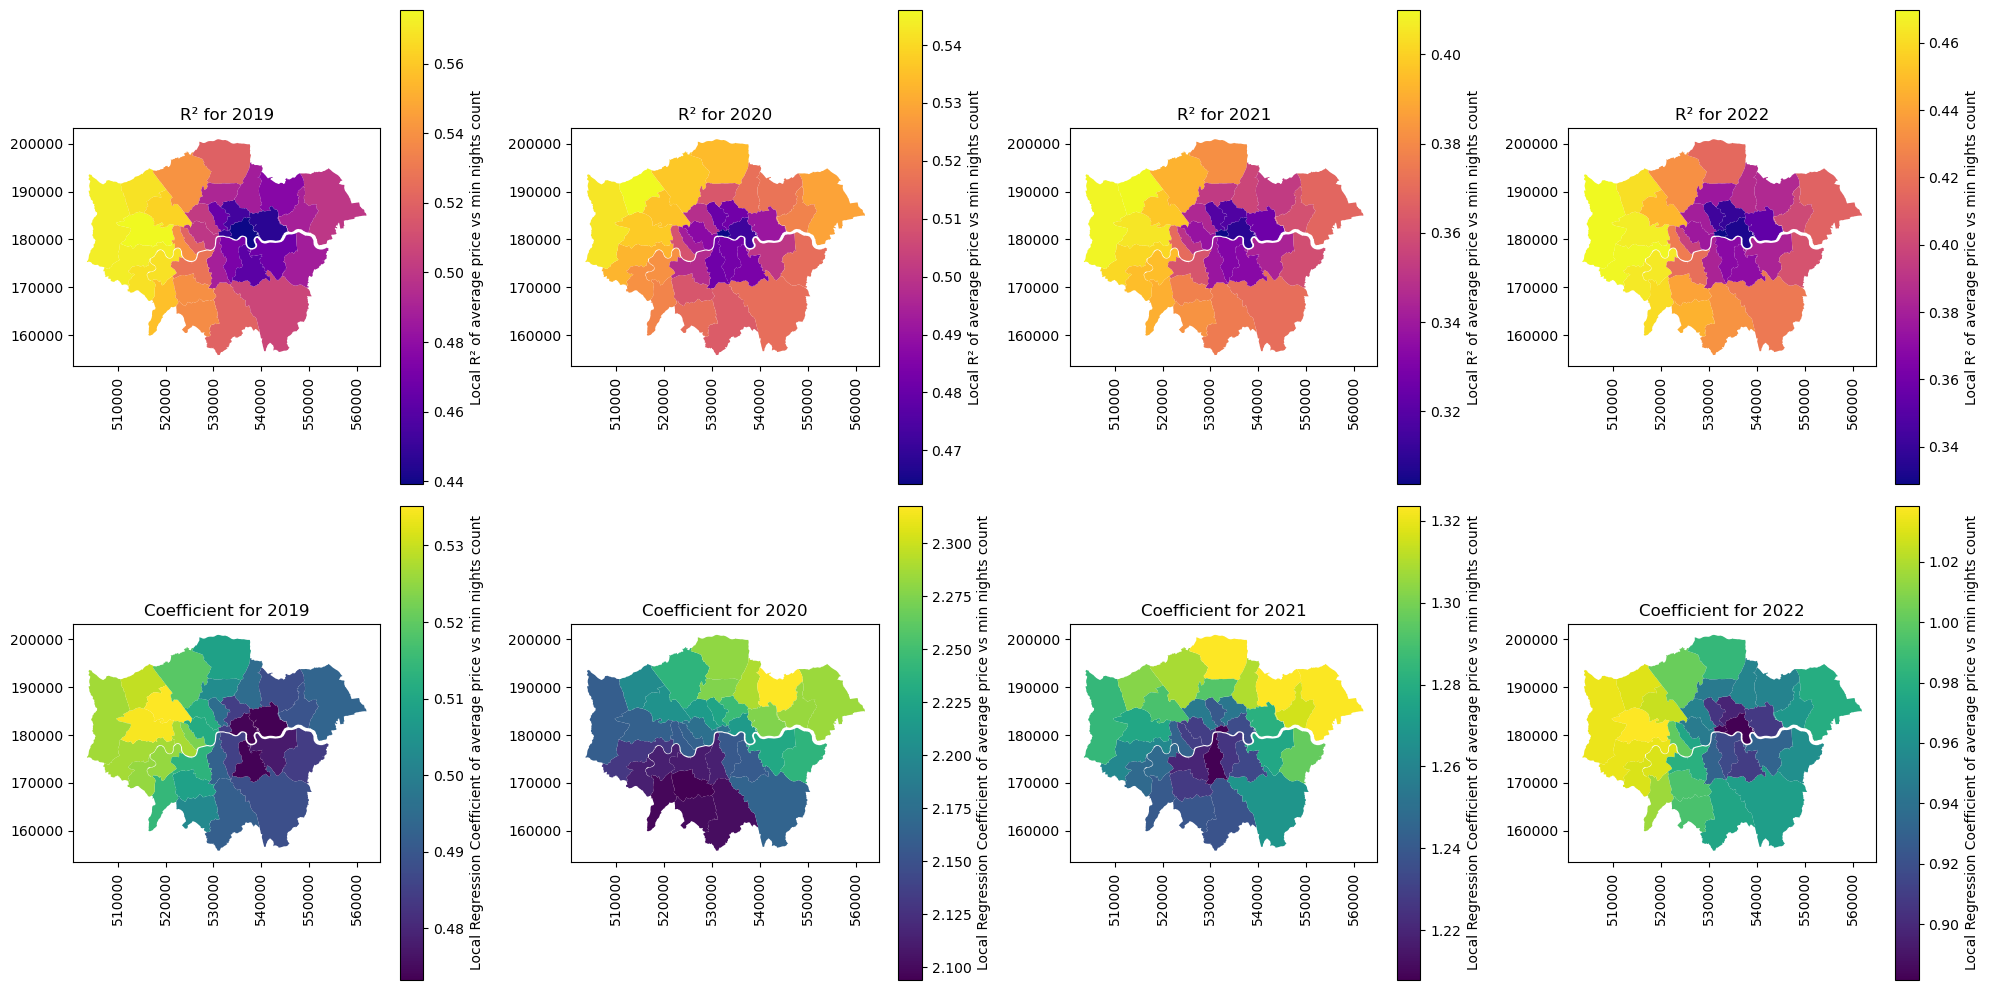

In [59]:
# Setting up the subgraph layout
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 行 4 列

# Define a list of column name prefixes
years = ['2019', '2020', '2021', '2022']
r2_columns = [f'local_R2_avg_price_{year}_vs_min_nights_count_{year}' for year in years]
param_columns = [f'local_params_avg_price_{year}_vs_min_nights_count_{year}' for year in years]

# R² mapped for each year
for i, year in enumerate(years):
    gdf_neighborhoods.plot(column=r2_columns[i], ax=axs[0, i], legend=True,
                           legend_kwds={'label': "Local R² of average price vs min nights count"},
                           cmap='plasma')  # Using viridis colour mapping
    axs[0, i].set_title(f'R² for {year}')
    axs[0, i].axis('on') 
    axs[0, i].tick_params(axis='x', labelrotation=90)




# Mapping of coefficients for each year
for i, year in enumerate(years):
    gdf_neighborhoods.plot(column=param_columns[i], ax=axs[1, i], legend=True,
                           legend_kwds={'label': "Local Regression Coefficient of average price vs min nights count"},
                           cmap='viridis')  # Using viridis colour mapping
    axs[1, i].set_title(f'Coefficient for {year}')
    axs[0, i].axis('on')  
    axs[1, i].tick_params(axis='x', labelrotation=90)

# Adjust subgraph spacing
plt.tight_layout()

# Display graphics
plt.show()

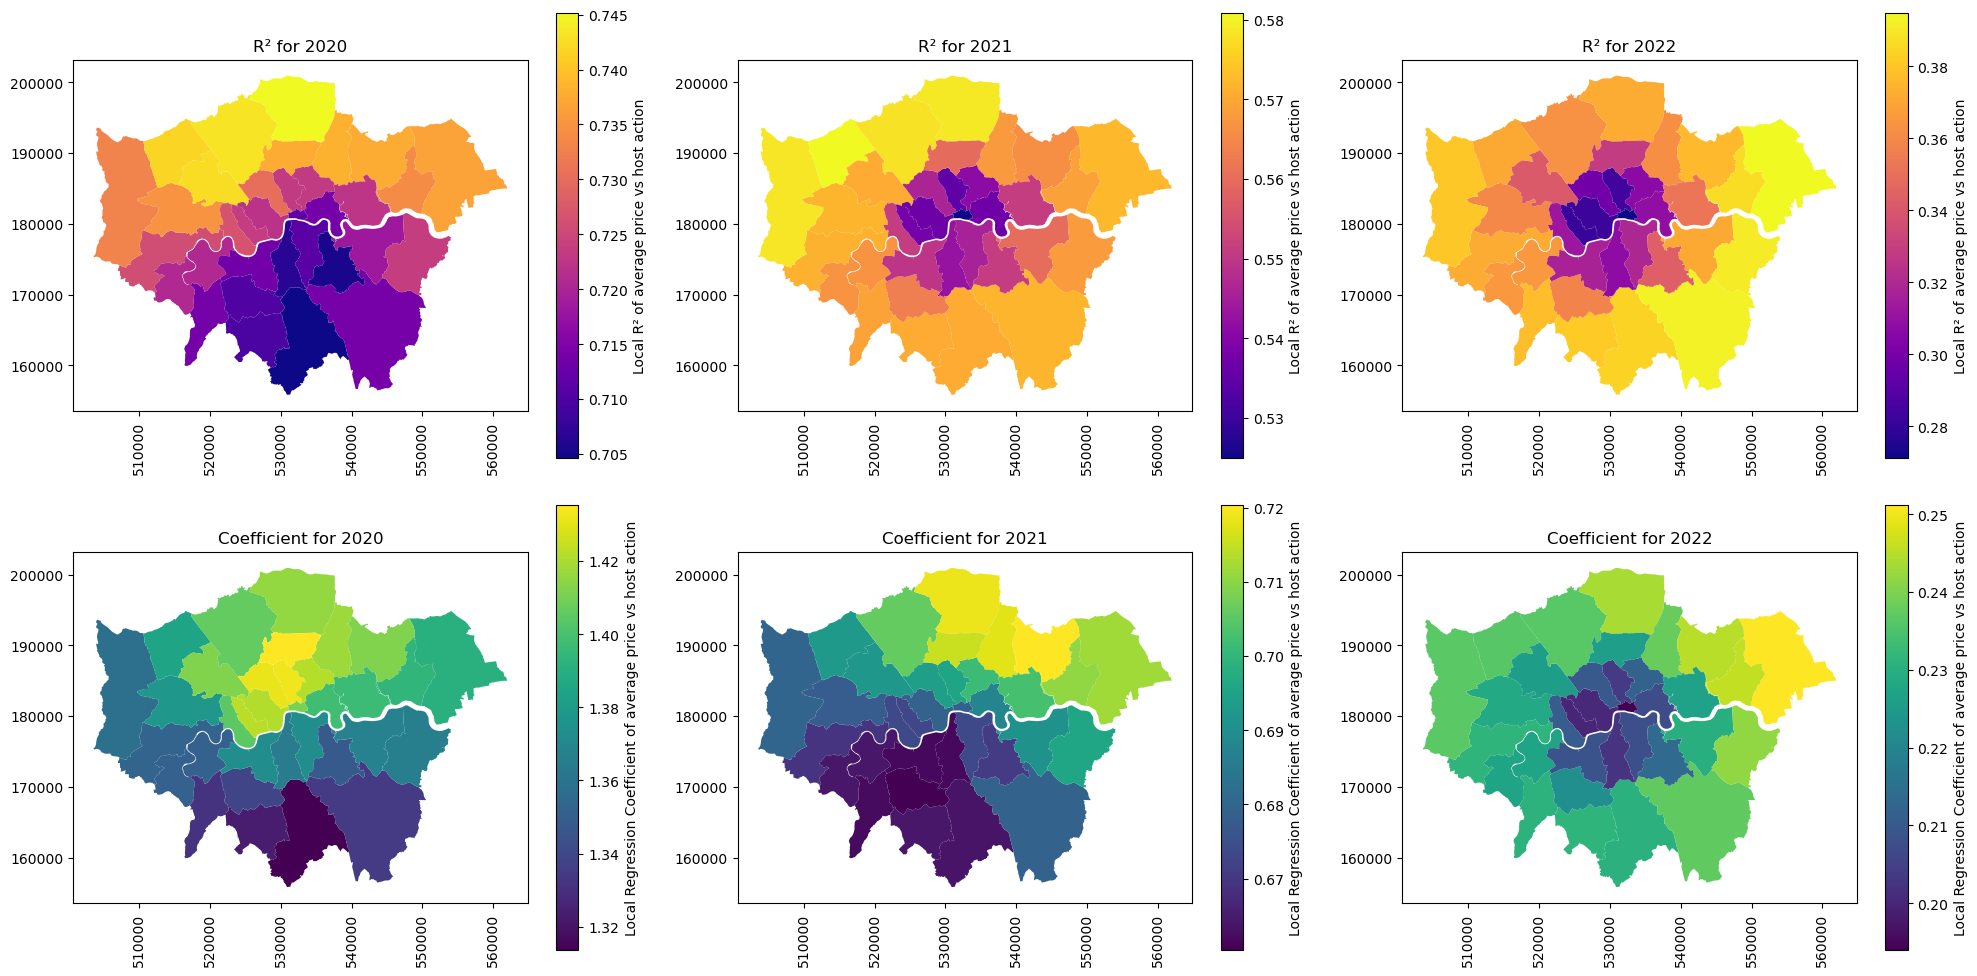

In [60]:
# Setting up the subgraph layout
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # 2 行 3 列

# Define a list of column name prefixes
years = ['2020', '2021', '2022']
r2_columns = [f'local_R2_avg_price_{year}_vs_host_action_{year}' for year in years]
param_columns = [f'local_params_avg_price_{year}_vs_host_action_{year}' for year in years]

# R² mapped for each year
for i, year in enumerate(years):
    gdf_neighborhoods.plot(column=r2_columns[i], ax=axs[0, i], legend=True,
                           legend_kwds={'label': "Local R² of average price vs host action"},
                           cmap='plasma')  # Using viridis colour mapping
    axs[0, i].set_title(f'R² for {year}')
    axs[0, i].axis('on')  
    axs[0, i].tick_params(axis='x', labelrotation=90)

# Mapping of coefficients for each year
for i, year in enumerate(years):
    gdf_neighborhoods.plot(column=param_columns[i], ax=axs[1, i], legend=True,
                           legend_kwds={'label': "Local Regression Coefficient of average price vs host action"},
                           cmap='viridis')  # Using viridis colour mapping
    axs[1, i].set_title(f'Coefficient for {year}')
    axs[0, i].axis('on') 
    axs[1, i].tick_params(axis='x', labelrotation=90)

# Adjust subgraph spacing
plt.tight_layout()

# Display graphics
plt.show()
